## In Progress Personal Project to prove that 49ers were the most tumultuous team in the NFL for the past decade.
Plots below show the standard deviation of their season standing (1-32) and their W/L Ratio including playoffs (this assumption may be a cause for error) were both above
the league average and also the highest values.
Further studies will incorporate other sports and more intense visualizations to discover which single sport team across the 4 major American sports leagues (NHL, MLB, NFL, NBA) was the most inconsistent: My hypothesis is still the 49ers


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines

In [8]:
NFL_stats = pd.read_excel(r'C:\Users\heymihir\Documents\GitHub\mihirt-10.github.io\Data\Sports Stats.xlsx')
NFL_stats.index += 1
NFL_stats

#Record is Total W/L Percentage including playoff games (on total games played, so playoffteams and superbowl winners played more games)
#Standing is from #1 draft pick to 32nd draft pick

#Make dataframe of team name as columns, years as rows values as records


,2011-Standing,2011-Record,2012-Standing,2012-Record,2013-Standing,2013-Record,2014-Standing,2014-Record,2015-Standing,2015-Record,2016-Standing,2016-Record,2017-Standing,2017-Record,2018-Standing,2018-Record,2019-Standing,2019-Record,2020-Standing,2020-Record
1,Colts,0.125000,Chiefs,0.125000,Texans,0.125000,Buccaneers,0.125000,Titans,0.187500,Browns,0.062500,Browns,0.000000,Cardinals,0.187500,Bengals,0.125000,Jaguars,0.062500
2,Rams,0.125000,Jaguars,0.125000,Redskins,0.187500,Titans,0.125000,Browns,0.187500,49ers,0.125000,Giants,0.187500,49ers,0.250000,Redskins,0.187500,Jets,0.125000
3,Vikings,0.187500,Raiders,0.250000,Jaguars,0.250000,Jaguars,0.187500,Chargers,0.250000,Bears,0.187500,Colts,0.250000,Jets,0.250000,Lions,0.200000,Texans,0.250000
4,Browns,0.250000,Eagles,0.250000,Browns,0.250000,Raiders,0.187500,Cowboys,0.250000,Jaguars,0.250000,Texans,0.250000,Raiders,0.250000,Giants,0.250000,Falcons,0.250000
5,Buccaneers,0.250000,Lions,0.250000,Raiders,0.250000,Redskins,0.250000,Jaguars,0.312500,Rams,0.312500,Broncos,0.312500,Buccaneers,0.312500,Dolphins,0.312500,Bengals,0.266667
6,Redskins,0.312500,Browns,0.312500,Falcons,0.250000,Jets,0.250000,Ravens,0.312500,Jets,0.312500,Jets,0.312500,Giants,0.312500,Chargers,0.312500,Eagles,0.266667
7,Jaguars,0.312500,Cardinals,0.312500,Buccaneers,0.250000,Bears,0.312500,49ers,0.312500,Chargers,0.312500,Buccaneers,0.312500,Jaguars,0.312500,Panthers,0.312500,Lions,0.312500
8,Dolphins,0.375000,Bills,0.375000,Vikings,0.500000,Falcons,0.375000,Dolphins,0.375000,Panthers,0.375000,Bears,0.312500,Lions,0.375000,Cardinals,0.333333,Panthers,0.312500
9,Panthers,0.375000,Jets,0.375000,Bills,0.600000,Giants,0.375000,Buccaneers,0.375000,Bengals,0.400000,49ers,0.375000,Bills,0.375000,Jaguars,0.375000,Broncos,0.312500
10,Bills,0.375000,Titans,0.375000,Lions,0.437500,Rams,0.375000,Giants,0.375000,Bills,0.437500,Raiders,0.375000,Broncos,0.375000,Browns,0.375000,Cowboys,0.375000


In [9]:
#By Standing
NFL_stand = NFL_stats[NFL_stats.columns.drop(list(NFL_stats.filter(regex='Record')))]
NFL_stand

,2011-Standing,2012-Standing,2013-Standing,2014-Standing,2015-Standing,2016-Standing,2017-Standing,2018-Standing,2019-Standing,2020-Standing
1,Colts,Chiefs,Texans,Buccaneers,Titans,Browns,Browns,Cardinals,Bengals,Jaguars
2,Rams,Jaguars,Redskins,Titans,Browns,49ers,Giants,49ers,Redskins,Jets
3,Vikings,Raiders,Jaguars,Jaguars,Chargers,Bears,Colts,Jets,Lions,Texans
4,Browns,Eagles,Browns,Raiders,Cowboys,Jaguars,Texans,Raiders,Giants,Falcons
5,Buccaneers,Lions,Raiders,Redskins,Jaguars,Rams,Broncos,Buccaneers,Dolphins,Bengals
6,Redskins,Browns,Falcons,Jets,Ravens,Jets,Jets,Giants,Chargers,Eagles
7,Jaguars,Cardinals,Buccaneers,Bears,49ers,Chargers,Buccaneers,Jaguars,Panthers,Lions
8,Dolphins,Bills,Vikings,Falcons,Dolphins,Panthers,Bears,Lions,Cardinals,Panthers
9,Panthers,Jets,Bills,Giants,Buccaneers,Bengals,49ers,Bills,Jaguars,Broncos
10,Bills,Titans,Lions,Rams,Giants,Bills,Raiders,Broncos,Browns,Cowboys


In [10]:
Years_Standing = list(NFL_stand)
#Years_Standing


In [11]:
TL = list(NFL_stand[NFL_stand.columns[0]])
TeamList = sorted(TL)
#TeamList

In [12]:
#print(NFL_stand[NFL_stand['2011-Standing']=='49ers'].index.values)
#print(NFL_stand[NFL_stand['2011-Standing']=='49ers']) #checking how to find index of ranking by team name


In [13]:
#By Record (Team names not shown)
NFL_rec = NFL_stats[NFL_stats.columns.drop(list(NFL_stats.filter(regex='Standing')))]
#NFL_rec

In [20]:
#In order of teams (10 49er entries for 10 years 10 Bears entries for 10 years...etc)
TeamRanks = []
for team in TeamList:
    for column in NFL_stand:
        TeamRanks.append(NFL_stand[NFL_stand[column] == team].index.values)
#TeamRanks #array of team standings every year ordered by team in team list 


In [21]:
#change to list of ints
StandList = []
for standing in TeamRanks:
    StandList.append(standing.astype(int).tolist())
StandList
flat_list = [item for sublist in StandList for item in sublist]
len(flat_list)
#flat_list

320

In [22]:
TeamRankList = [flat_list[i:i+10] for i in range(0, len(flat_list), 10)]  
TeamRankList[0] #for 49ers these are the 10 standings for each year from 2011 to 2020

[30, 31, 30, 15, 7, 2, 9, 2, 31, 12]

In [23]:
RankingDict = {}
RankingDict = dict(zip(TeamList, TeamRankList))
RankingDict

{'49ers': [30, 31, 30, 15, 7, 2, 9, 2, 31, 12],
 'Bears': [19, 20, 14, 7, 11, 3, 8, 24, 19, 20],
 'Bengals': [21, 21, 24, 21, 24, 9, 12, 11, 1, 5],
 'Bills': [10, 8, 9, 19, 19, 10, 21, 9, 22, 30],
 'Broncos': [25, 28, 31, 28, 32, 20, 5, 10, 15, 9],
 'Browns': [4, 6, 4, 12, 2, 1, 1, 17, 10, 26],
 'Buccaneers': [5, 13, 7, 1, 9, 19, 7, 5, 14, 32],
 'Cardinals': [13, 7, 20, 24, 30, 13, 15, 1, 8, 16],
 'Chargers': [18, 11, 25, 17, 3, 7, 17, 28, 6, 13],
 'Chiefs': [11, 1, 23, 18, 28, 27, 22, 29, 32, 31],
 'Colts': [1, 24, 26, 29, 18, 15, 3, 26, 13, 21],
 'Cowboys': [14, 18, 16, 27, 4, 28, 19, 27, 17, 10],
 'Dolphins': [8, 12, 19, 14, 8, 22, 11, 13, 5, 18],
 'Eagles': [15, 4, 22, 20, 13, 12, 32, 25, 21, 6],
 'Falcons': [22, 30, 6, 8, 17, 31, 26, 14, 16, 4],
 'Giants': [32, 19, 12, 9, 10, 23, 2, 6, 4, 11],
 'Jaguars': [7, 2, 3, 3, 5, 4, 29, 7, 9, 1],
 'Jets': [16, 9, 18, 6, 20, 6, 6, 3, 11, 2],
 'Lions': [23, 5, 10, 23, 16, 21, 20, 8, 3, 7],
 'Packers': [28, 26, 21, 30, 27, 29, 14, 12, 30, 29]

# By Standing

In [24]:
RankTable = pd.DataFrame.from_dict(RankingDict)
RankTable = RankTable.set_index(pd.Index(Years_Standing))
RankTable

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,...,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
2011-Standing,30,19,21,10,25,4,5,13,18,11,...,17,2,29,6,27,12,24,26,20,3
2012-Standing,31,20,21,8,28,6,13,7,11,1,...,3,16,32,22,15,25,17,27,10,23
2013-Standing,30,14,24,9,31,4,7,20,25,23,...,5,13,17,2,27,32,15,1,11,8
2014-Standing,15,7,21,19,28,12,1,24,17,18,...,4,10,26,5,13,31,22,16,2,11
2015-Standing,7,11,24,19,32,2,9,30,3,28,...,14,15,6,21,12,26,25,22,1,23
2016-Standing,2,3,9,10,20,1,19,13,7,27,...,24,5,16,17,11,26,30,25,18,14
2017-Standing,9,8,12,21,5,1,7,15,17,22,...,10,23,16,13,27,18,28,4,25,30
2018-Standing,2,24,11,9,10,17,5,1,28,29,...,4,31,22,15,30,21,20,23,19,18
2019-Standing,31,19,1,22,15,10,14,8,6,32,...,12,20,28,2,24,27,18,26,29,25
2020-Standing,12,20,5,30,9,26,32,16,13,31,...,17,25,27,19,28,23,24,3,22,14


In [25]:
RankStatsTable = RankTable.describe()
RankStatsTable
pd.set_option('display.max_columns',32)
RankStatsTable

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,Jaguars,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,16.900000,14.500000,14.90000,15.700000,20.300000,8.300000,11.200000,14.700000,14.500000,22.20000,17.600000,18.000000,13.000000,17.000000,17.40000,12.80000,7.000000,9.700000,13.600000,24.600000,17.000000,28.300000,11.000000,16.000000,21.900000,12.200000,21.400000,24.100000,22.300000,17.30000,15.700000,16.900000
std,12.350888,6.948221,8.34599,7.513691,9.933669,8.124722,8.978988,8.485936,8.113774,9.82966,9.663218,7.774603,5.395471,8.653837,9.72054,9.29516,8.124038,6.342975,7.834397,6.669999,9.225568,5.396501,7.071068,9.030811,8.020114,7.814516,7.647803,5.971227,4.831609,10.58353,9.405081,8.412293
min,2.000000,3.000000,1.00000,8.000000,5.000000,1.000000,1.000000,1.000000,3.000000,1.00000,1.000000,4.000000,5.000000,4.000000,4.00000,2.00000,1.000000,2.000000,3.000000,12.000000,7.000000,15.000000,3.000000,2.000000,6.000000,2.000000,11.000000,12.000000,15.000000,1.00000,1.000000,3.000000
25%,7.500000,8.750000,9.50000,9.250000,11.250000,2.500000,5.500000,9.250000,8.000000,19.00000,13.500000,14.500000,8.750000,12.250000,9.50000,6.75000,3.000000,6.000000,7.250000,22.250000,8.250000,29.000000,4.250000,10.750000,16.250000,5.250000,13.500000,21.500000,18.500000,7.00000,10.250000,11.750000
50%,13.500000,16.500000,16.50000,14.500000,22.500000,5.000000,8.000000,14.000000,15.000000,25.00000,19.500000,17.500000,12.500000,17.500000,16.50000,10.50000,4.500000,7.500000,13.000000,27.500000,15.000000,30.000000,11.000000,15.500000,24.000000,14.000000,25.500000,25.500000,23.000000,22.50000,18.500000,16.000000
75%,30.000000,19.750000,21.00000,20.500000,28.000000,11.500000,13.750000,19.000000,17.750000,28.75000,25.500000,25.000000,17.000000,21.750000,25.00000,17.25000,7.000000,14.750000,20.750000,29.000000,24.750000,31.750000,16.250000,22.250000,27.750000,18.500000,27.000000,26.750000,24.750000,25.75000,21.500000,23.000000
max,31.000000,24.000000,24.00000,30.000000,32.000000,26.000000,32.000000,30.000000,28.000000,32.00000,29.000000,28.000000,22.000000,32.000000,31.00000,32.00000,29.000000,20.000000,23.000000,30.000000,31.000000,32.000000,24.000000,31.000000,32.000000,22.000000,30.000000,32.000000,30.000000,27.00000,29.000000,30.000000


In [26]:
RankTotalTable = RankTable.append(RankStatsTable)
RankTotalTable


,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,Jaguars,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
2011-Standing,30.000000,19.000000,21.00000,10.000000,25.000000,4.000000,5.000000,13.000000,18.000000,11.00000,1.000000,14.000000,8.000000,15.000000,22.00000,32.00000,7.000000,16.000000,23.000000,28.000000,9.000000,31.000000,17.000000,2.000000,29.000000,6.000000,27.000000,12.000000,24.000000,26.00000,20.000000,3.000000
2012-Standing,31.000000,20.000000,21.00000,8.000000,28.000000,6.000000,13.000000,7.000000,11.000000,1.00000,24.000000,18.000000,12.000000,4.000000,30.00000,19.00000,2.000000,9.000000,5.000000,26.000000,14.000000,29.000000,3.000000,16.000000,32.000000,22.000000,15.000000,25.000000,17.000000,27.00000,10.000000,23.000000
2013-Standing,30.000000,14.000000,24.00000,9.000000,31.000000,4.000000,7.000000,20.000000,25.000000,23.00000,26.000000,16.000000,19.000000,22.000000,6.00000,12.00000,3.000000,18.000000,10.000000,21.000000,28.000000,29.000000,5.000000,13.000000,17.000000,2.000000,27.000000,32.000000,15.000000,1.00000,11.000000,8.000000
2014-Standing,15.000000,7.000000,21.00000,19.000000,28.000000,12.000000,1.000000,24.000000,17.000000,18.00000,29.000000,27.000000,14.000000,20.000000,8.00000,9.00000,3.000000,6.000000,23.000000,30.000000,25.000000,32.000000,4.000000,10.000000,26.000000,5.000000,13.000000,31.000000,22.000000,16.00000,2.000000,11.000000
2015-Standing,7.000000,11.000000,24.00000,19.000000,32.000000,2.000000,9.000000,30.000000,3.000000,28.00000,18.000000,4.000000,8.000000,13.000000,17.00000,10.00000,5.000000,20.000000,16.000000,27.000000,31.000000,29.000000,14.000000,15.000000,6.000000,21.000000,12.000000,26.000000,25.000000,22.00000,1.000000,23.000000
2016-Standing,2.000000,3.000000,9.00000,10.000000,20.000000,1.000000,19.000000,13.000000,7.000000,27.00000,15.000000,28.000000,22.000000,12.000000,31.00000,23.00000,4.000000,6.000000,21.000000,29.000000,8.000000,32.000000,24.000000,5.000000,16.000000,17.000000,11.000000,26.000000,30.000000,25.00000,18.000000,14.000000
2017-Standing,9.000000,8.000000,12.00000,21.000000,5.000000,1.000000,7.000000,15.000000,17.000000,22.00000,3.000000,19.000000,11.000000,32.000000,26.00000,2.00000,29.000000,6.000000,20.000000,14.000000,24.000000,31.000000,10.000000,23.000000,16.000000,13.000000,27.000000,18.000000,28.000000,4.00000,25.000000,30.000000
2018-Standing,2.000000,24.000000,11.00000,9.000000,10.000000,17.000000,5.000000,1.000000,28.000000,29.00000,26.000000,27.000000,13.000000,25.000000,14.00000,6.00000,7.000000,3.000000,8.000000,12.000000,16.000000,32.000000,4.000000,31.000000,22.000000,15.000000,30.000000,21.000000,20.000000,23.00000,19.000000,18.000000
2019-Standing,31.000000,19.000000,1.00000,22.000000,15.000000,10.000000,14.000000,8.000000,6.000000,32.00000,13.000000,17.000000,5.000000,21.000000,16.00000,4.00000,9.000000,11.000000,3.000000,30.000000,7.000000,23.000000,12.000000,20.000000,28.000000,2.000000,24.000000,27.000000,18.000000,26.00000,29.000000,25.000000
2020-Standing,12.000000,20.000000,5.00000,30.000000,9.000000,26.000000,32.000000,16.000000,13.000000,31.00000,21.000000,10.000000,18.000000,6.000000,4.00000,11.00000,1.000000,2.000000,7.000000,29.000000,8.000000,15.000000,17.000000,25.000000,27.000000,19.000000,28.000000,23.000000,24.000000,3.00000,22.000000,14.000000


In [27]:
RankTotalTable['Max'] = RankTotalTable.idxmax(axis=1) #maximum of each row 

In [28]:
RankTotalTable
#Count goes to 49ers only because its the first in the list 
#min goes to patriots cause they have the highest worst placement ranking
#max goes to broncos cause in the list theyre alphabetically first to win superbowl

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,...,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings,Max
2011-Standing,30.000000,19.000000,21.00000,10.000000,25.000000,4.000000,5.000000,13.000000,18.000000,11.00000,1.000000,14.000000,8.000000,15.000000,22.00000,32.00000,...,16.000000,23.000000,28.000000,9.000000,31.000000,17.000000,2.000000,29.000000,6.000000,27.000000,12.000000,24.000000,26.00000,20.000000,3.000000,Giants
2012-Standing,31.000000,20.000000,21.00000,8.000000,28.000000,6.000000,13.000000,7.000000,11.000000,1.00000,24.000000,18.000000,12.000000,4.000000,30.00000,19.00000,...,9.000000,5.000000,26.000000,14.000000,29.000000,3.000000,16.000000,32.000000,22.000000,15.000000,25.000000,17.000000,27.00000,10.000000,23.000000,Ravens
2013-Standing,30.000000,14.000000,24.00000,9.000000,31.000000,4.000000,7.000000,20.000000,25.000000,23.00000,26.000000,16.000000,19.000000,22.000000,6.00000,12.00000,...,18.000000,10.000000,21.000000,28.000000,29.000000,5.000000,13.000000,17.000000,2.000000,27.000000,32.000000,15.000000,1.00000,11.000000,8.000000,Seahawks
2014-Standing,15.000000,7.000000,21.00000,19.000000,28.000000,12.000000,1.000000,24.000000,17.000000,18.00000,29.000000,27.000000,14.000000,20.000000,8.00000,9.00000,...,6.000000,23.000000,30.000000,25.000000,32.000000,4.000000,10.000000,26.000000,5.000000,13.000000,31.000000,22.000000,16.00000,2.000000,11.000000,Patriots
2015-Standing,7.000000,11.000000,24.00000,19.000000,32.000000,2.000000,9.000000,30.000000,3.000000,28.00000,18.000000,4.000000,8.000000,13.000000,17.00000,10.00000,...,20.000000,16.000000,27.000000,31.000000,29.000000,14.000000,15.000000,6.000000,21.000000,12.000000,26.000000,25.000000,22.00000,1.000000,23.000000,Broncos
2016-Standing,2.000000,3.000000,9.00000,10.000000,20.000000,1.000000,19.000000,13.000000,7.000000,27.00000,15.000000,28.000000,22.000000,12.000000,31.00000,23.00000,...,6.000000,21.000000,29.000000,8.000000,32.000000,24.000000,5.000000,16.000000,17.000000,11.000000,26.000000,30.000000,25.00000,18.000000,14.000000,Patriots
2017-Standing,9.000000,8.000000,12.00000,21.000000,5.000000,1.000000,7.000000,15.000000,17.000000,22.00000,3.000000,19.000000,11.000000,32.000000,26.00000,2.00000,...,6.000000,20.000000,14.000000,24.000000,31.000000,10.000000,23.000000,16.000000,13.000000,27.000000,18.000000,28.000000,4.00000,25.000000,30.000000,Eagles
2018-Standing,2.000000,24.000000,11.00000,9.000000,10.000000,17.000000,5.000000,1.000000,28.000000,29.00000,26.000000,27.000000,13.000000,25.000000,14.00000,6.00000,...,3.000000,8.000000,12.000000,16.000000,32.000000,4.000000,31.000000,22.000000,15.000000,30.000000,21.000000,20.000000,23.00000,19.000000,18.000000,Patriots
2019-Standing,31.000000,19.000000,1.00000,22.000000,15.000000,10.000000,14.000000,8.000000,6.000000,32.00000,13.000000,17.000000,5.000000,21.000000,16.00000,4.00000,...,11.000000,3.000000,30.000000,7.000000,23.000000,12.000000,20.000000,28.000000,2.000000,24.000000,27.000000,18.000000,26.00000,29.000000,25.000000,Chiefs
2020-Standing,12.000000,20.000000,5.00000,30.000000,9.000000,26.000000,32.000000,16.000000,13.000000,31.00000,21.000000,10.000000,18.000000,6.000000,4.00000,11.00000,...,2.000000,7.000000,29.000000,8.000000,15.000000,17.000000,25.000000,27.000000,19.000000,28.000000,23.000000,24.000000,3.00000,22.000000,14.000000,Buccaneers


In [29]:
RankStatsTable['League Avg'] = RankStatsTable.mean(axis=1)
RankStatsTable

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,...,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings,League Avg
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,16.900000,14.500000,14.90000,15.700000,20.300000,8.300000,11.200000,14.700000,14.500000,22.20000,17.600000,18.000000,13.000000,17.000000,17.40000,12.80000,...,9.700000,13.600000,24.600000,17.000000,28.300000,11.000000,16.000000,21.900000,12.200000,21.400000,24.100000,22.300000,17.30000,15.700000,16.900000,16.500000
std,12.350888,6.948221,8.34599,7.513691,9.933669,8.124722,8.978988,8.485936,8.113774,9.82966,9.663218,7.774603,5.395471,8.653837,9.72054,9.29516,...,6.342975,7.834397,6.669999,9.225568,5.396501,7.071068,9.030811,8.020114,7.814516,7.647803,5.971227,4.831609,10.58353,9.405081,8.412293,8.172184
min,2.000000,3.000000,1.00000,8.000000,5.000000,1.000000,1.000000,1.000000,3.000000,1.00000,1.000000,4.000000,5.000000,4.000000,4.00000,2.00000,...,2.000000,3.000000,12.000000,7.000000,15.000000,3.000000,2.000000,6.000000,2.000000,11.000000,12.000000,15.000000,1.00000,1.000000,3.000000,4.437500
25%,7.500000,8.750000,9.50000,9.250000,11.250000,2.500000,5.500000,9.250000,8.000000,19.00000,13.500000,14.500000,8.750000,12.250000,9.50000,6.75000,...,6.000000,7.250000,22.250000,8.250000,29.000000,4.250000,10.750000,16.250000,5.250000,13.500000,21.500000,18.500000,7.00000,10.250000,11.750000,10.953125
50%,13.500000,16.500000,16.50000,14.500000,22.500000,5.000000,8.000000,14.000000,15.000000,25.00000,19.500000,17.500000,12.500000,17.500000,16.50000,10.50000,...,7.500000,13.000000,27.500000,15.000000,30.000000,11.000000,15.500000,24.000000,14.000000,25.500000,25.500000,23.000000,22.50000,18.500000,16.000000,16.796875
75%,30.000000,19.750000,21.00000,20.500000,28.000000,11.500000,13.750000,19.000000,17.750000,28.75000,25.500000,25.000000,17.000000,21.750000,25.00000,17.25000,...,14.750000,20.750000,29.000000,24.750000,31.750000,16.250000,22.250000,27.750000,18.500000,27.000000,26.750000,24.750000,25.75000,21.500000,23.000000,21.968750
max,31.000000,24.000000,24.00000,30.000000,32.000000,26.000000,32.000000,30.000000,28.000000,32.00000,29.000000,28.000000,22.000000,32.000000,31.00000,32.00000,...,20.000000,23.000000,30.000000,31.000000,32.000000,24.000000,31.000000,32.000000,22.000000,30.000000,32.000000,30.000000,27.00000,29.000000,30.000000,28.593750


# By W/L Record

In [30]:
Indexed_standing = [] ##For Future working with indices on the records study
for val in flat_list:
    Indexed_standing.append(val-1)
Indexed_standing

Indexed_standlist = [Indexed_standing[i:i+10] for i in range(0, len(Indexed_standing), 10)]  
len(Indexed_standlist) #List of Lists that has the indexes for each teams record in the dataframe below by each year 
#teamlist ordered alphanumerically

32

In [31]:
Indexed_standlist[0] #49ers Standings (-1) for each year

[29, 30, 29, 14, 6, 1, 8, 1, 30, 11]

In [32]:
#NFL_rec

In [33]:
Transposed_rec = NFL_rec.T
Transposed_rec

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
2011-Record,0.1250,0.1250,0.1875,0.2500,0.250000,0.312500,0.3125,0.375000,0.3750,0.3750,0.4375,0.4375,0.500000,0.5000,0.5000,0.500000,0.500000,0.500000,0.500000,0.562500,0.529412,0.588235,0.588235,0.705882,0.500000,0.611111,0.722222,0.882353,0.722222,0.777778,0.789474,0.650000
2012-Record,0.1250,0.1250,0.2500,0.2500,0.250000,0.312500,0.3125,0.375000,0.3750,0.3750,0.4375,0.4375,0.437500,0.4375,0.4375,0.466667,0.500000,0.500000,0.562500,0.625000,0.588235,0.588235,0.588235,0.647059,0.666667,0.666667,0.722222,0.764706,0.722222,0.777778,0.722222,0.700000
2013-Record,0.1250,0.1875,0.2500,0.2500,0.250000,0.250000,0.2500,0.500000,0.6000,0.4375,0.4375,0.4375,0.437500,0.5000,0.5000,0.500000,0.500000,0.500000,0.500000,0.625000,0.500000,0.588235,0.647059,0.647059,0.555556,0.666667,0.666667,0.705882,0.736842,0.736842,0.789474,0.842105
2014-Record,0.1250,0.1250,0.1875,0.1875,0.250000,0.250000,0.3125,0.375000,0.3750,0.3750,0.4375,0.4375,0.437500,0.5000,0.5000,0.562500,0.562500,0.562500,0.562500,0.625000,0.625000,0.647059,0.647059,0.647059,0.470588,0.611111,0.722222,0.705882,0.684211,0.722222,0.736842,0.789474
2015-Record,0.1875,0.1875,0.2500,0.2500,0.312500,0.312500,0.3125,0.375000,0.3750,0.3750,0.3750,0.4375,0.437500,0.4375,0.4375,0.437500,0.500000,0.500000,0.500000,0.625000,0.529412,0.529412,0.647059,0.705882,0.611111,0.611111,0.611111,0.666667,0.722222,0.777778,0.894737,0.789474
2016-Record,0.0625,0.1250,0.1875,0.2500,0.312500,0.312500,0.3125,0.375000,0.4000,0.4375,0.4375,0.4375,0.466667,0.5000,0.5000,0.500000,0.533333,0.562500,0.562500,0.562500,0.529412,0.529412,0.647059,0.705882,0.555556,0.647059,0.705882,0.764706,0.631579,0.684211,0.684211,0.894737
2017-Record,0.0000,0.1875,0.2500,0.2500,0.312500,0.312500,0.3125,0.312500,0.3750,0.3750,0.3750,0.4375,0.437500,0.4375,0.5000,0.562500,0.562500,0.562500,0.562500,0.562500,0.529412,0.588235,0.687500,0.647059,0.555556,0.611111,0.666667,0.764706,0.631579,0.722222,0.789474,0.842105
2018-Record,0.1875,0.2500,0.2500,0.2500,0.312500,0.312500,0.3125,0.375000,0.3750,0.3750,0.3750,0.4000,0.437500,0.4375,0.4375,0.437500,0.466667,0.533333,0.562500,0.600000,0.588235,0.588235,0.647059,0.705882,0.555556,0.611111,0.611111,0.777778,0.722222,0.777778,0.789474,0.736842
2019-Record,0.1250,0.1875,0.2000,0.2500,0.312500,0.312500,0.3125,0.333333,0.3750,0.3750,0.4375,0.4375,0.437500,0.4375,0.4375,0.437500,0.500000,0.500000,0.500000,0.562500,0.529412,0.588235,0.705882,0.764706,0.611111,0.611111,0.666667,0.823529,0.578947,0.777778,0.789474,0.789474
2020-Record,0.0625,0.1250,0.2500,0.2500,0.266667,0.266667,0.3125,0.312500,0.3125,0.3750,0.3750,0.3750,0.437500,0.4375,0.4375,0.500000,0.500000,0.625000,0.411765,0.470588,0.647059,0.647059,0.705882,0.705882,0.611111,0.666667,0.666667,0.722222,0.777778,0.789474,0.842105,0.750000


In [34]:
WL_Ratios = [] #Use the index of a teams ranking in the previously created team rank list
                #Locate the corresponding record for that team by looping through the years
                #Create a dataframe similar to the one created before with values of W/L record by team each year
for team in Indexed_standlist:
    i = 0
    while i < 10:
        WL_Ratios.append(Transposed_rec.iloc[i,team[i]])
        i+=1
TeamRecList = [WL_Ratios[i:i+10] for i in range(0, len(WL_Ratios), 10)]  
TeamRecList[0] #WL ratios for each season of the 49ers 2011-2020

[0.7777777777777778,
 0.7222222222222222,
 0.7368421052631579,
 0.5,
 0.3125,
 0.125,
 0.375,
 0.25,
 0.7894736842105263,
 0.375]

In [35]:
RecordDict = {}
RecordDict = dict(zip(TeamList, TeamRecList))
#RecordDict

In [36]:
RecordTable = pd.DataFrame.from_dict(RecordDict)
RecordTable = RecordTable.set_index(pd.Index(Years_Standing))
RecordTable

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,Jaguars,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
2011-Standing,0.777778,0.500000,0.529412,0.375000,0.500000,0.250000,0.2500,0.500000,0.500000,0.437500,0.125000,0.500000,0.375000,0.500000,0.588235,0.650000,0.312500,0.5000,0.588235,0.882353,0.375000,0.789474,0.500000,0.125000,0.722222,0.312500,0.722222,0.437500,0.705882,0.611111,0.562500,0.187500
2012-Standing,0.722222,0.625000,0.588235,0.375000,0.764706,0.312500,0.4375,0.312500,0.437500,0.125000,0.647059,0.500000,0.437500,0.250000,0.777778,0.562500,0.125000,0.3750,0.250000,0.666667,0.437500,0.722222,0.250000,0.466667,0.700000,0.588235,0.437500,0.666667,0.500000,0.722222,0.375000,0.588235
2013-Standing,0.736842,0.500000,0.647059,0.600000,0.789474,0.250000,0.2500,0.625000,0.555556,0.647059,0.666667,0.500000,0.500000,0.588235,0.250000,0.437500,0.250000,0.5000,0.437500,0.500000,0.705882,0.736842,0.250000,0.437500,0.500000,0.187500,0.666667,0.842105,0.500000,0.125000,0.437500,0.500000
2014-Standing,0.500000,0.312500,0.625000,0.562500,0.705882,0.437500,0.1250,0.647059,0.562500,0.562500,0.684211,0.722222,0.500000,0.625000,0.375000,0.375000,0.187500,0.2500,0.647059,0.722222,0.470588,0.789474,0.187500,0.375000,0.611111,0.250000,0.437500,0.736842,0.647059,0.562500,0.125000,0.437500
2015-Standing,0.312500,0.375000,0.705882,0.500000,0.789474,0.187500,0.3750,0.777778,0.250000,0.666667,0.500000,0.250000,0.375000,0.437500,0.500000,0.375000,0.312500,0.6250,0.437500,0.611111,0.894737,0.722222,0.437500,0.437500,0.312500,0.529412,0.437500,0.611111,0.611111,0.529412,0.187500,0.647059
2016-Standing,0.125000,0.187500,0.400000,0.437500,0.562500,0.062500,0.5625,0.466667,0.312500,0.705882,0.500000,0.764706,0.529412,0.437500,0.684211,0.647059,0.250000,0.3125,0.529412,0.631579,0.375000,0.894737,0.705882,0.312500,0.500000,0.533333,0.437500,0.647059,0.684211,0.555556,0.562500,0.500000
2017-Standing,0.375000,0.312500,0.437500,0.529412,0.312500,0.000000,0.3125,0.500000,0.562500,0.588235,0.250000,0.562500,0.375000,0.842105,0.611111,0.187500,0.631579,0.3125,0.562500,0.437500,0.647059,0.789474,0.375000,0.687500,0.562500,0.437500,0.666667,0.562500,0.764706,0.250000,0.555556,0.722222
2018-Standing,0.250000,0.705882,0.375000,0.375000,0.375000,0.466667,0.3125,0.187500,0.777778,0.722222,0.611111,0.611111,0.437500,0.555556,0.437500,0.312500,0.312500,0.2500,0.375000,0.400000,0.437500,0.736842,0.250000,0.789474,0.588235,0.437500,0.777778,0.588235,0.600000,0.647059,0.562500,0.533333
2019-Standing,0.789474,0.500000,0.125000,0.588235,0.437500,0.375000,0.4375,0.333333,0.312500,0.789474,0.437500,0.500000,0.312500,0.529412,0.437500,0.250000,0.375000,0.4375,0.200000,0.777778,0.312500,0.705882,0.437500,0.562500,0.823529,0.187500,0.764706,0.666667,0.500000,0.611111,0.578947,0.611111
2020-Standing,0.375000,0.470588,0.266667,0.789474,0.312500,0.666667,0.7500,0.500000,0.437500,0.842105,0.647059,0.375000,0.625000,0.266667,0.250000,0.375000,0.062500,0.1250,0.312500,0.777778,0.312500,0.437500,0.500000,0.611111,0.666667,0.411765,0.722222,0.705882,0.705882,0.250000,0.647059,0.437500


In [37]:
RecStatsTable = RecordTable.describe()
RecStatsTable
pd.set_option('display.max_columns',32)
RecStatsTable

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,Jaguars,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.496382,0.448897,0.469975,0.513212,0.554954,0.300833,0.381250,0.484984,0.470833,0.608664,0.506861,0.528554,0.446691,0.503197,0.491133,0.417206,0.281908,0.368750,0.433971,0.640699,0.496827,0.732467,0.389338,0.480475,0.598676,0.387525,0.607026,0.646457,0.621885,0.486397,0.459406,0.516446
std,0.244002,0.155047,0.183750,0.131397,0.195391,0.197474,0.177878,0.174438,0.156410,0.205521,0.189699,0.151172,0.093044,0.172901,0.176029,0.158317,0.155439,0.148634,0.149695,0.157508,0.191477,0.117398,0.159346,0.191984,0.142850,0.145991,0.150048,0.108601,0.096718,0.202027,0.177638,0.147202
min,0.125000,0.187500,0.125000,0.375000,0.312500,0.000000,0.125000,0.187500,0.250000,0.125000,0.125000,0.250000,0.312500,0.250000,0.250000,0.187500,0.062500,0.125000,0.200000,0.400000,0.312500,0.437500,0.187500,0.125000,0.312500,0.187500,0.437500,0.437500,0.500000,0.125000,0.125000,0.187500
25%,0.328125,0.328125,0.381250,0.390625,0.390625,0.203125,0.265625,0.366667,0.343750,0.568934,0.453125,0.500000,0.375000,0.437500,0.390625,0.328125,0.203125,0.265625,0.328125,0.527778,0.375000,0.722222,0.250000,0.390625,0.515625,0.265625,0.437500,0.593954,0.525000,0.319853,0.390625,0.453125
50%,0.437500,0.485294,0.483456,0.514706,0.531250,0.281250,0.343750,0.500000,0.468750,0.656863,0.555556,0.500000,0.437500,0.514706,0.468750,0.375000,0.281250,0.343750,0.437500,0.649123,0.437500,0.736842,0.406250,0.452083,0.599673,0.424632,0.666667,0.656863,0.629085,0.559028,0.559028,0.516667
75%,0.733187,0.500000,0.615809,0.581801,0.750000,0.421875,0.437500,0.593750,0.560764,0.718137,0.647059,0.598958,0.500000,0.580065,0.605392,0.531250,0.312500,0.484375,0.554228,0.763889,0.602941,0.789474,0.484375,0.598958,0.691667,0.506434,0.722222,0.696078,0.700464,0.611111,0.562500,0.605392
max,0.789474,0.705882,0.705882,0.789474,0.789474,0.666667,0.750000,0.777778,0.777778,0.842105,0.684211,0.764706,0.625000,0.842105,0.777778,0.650000,0.631579,0.625000,0.647059,0.882353,0.894737,0.894737,0.705882,0.789474,0.823529,0.588235,0.777778,0.842105,0.764706,0.722222,0.647059,0.722222


In [38]:
RecTotalTable = RecordTable.append(RecStatsTable)
RecTotalTable

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,Jaguars,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
2011-Standing,0.777778,0.500000,0.529412,0.375000,0.500000,0.250000,0.250000,0.500000,0.500000,0.437500,0.125000,0.500000,0.375000,0.500000,0.588235,0.650000,0.312500,0.500000,0.588235,0.882353,0.375000,0.789474,0.500000,0.125000,0.722222,0.312500,0.722222,0.437500,0.705882,0.611111,0.562500,0.187500
2012-Standing,0.722222,0.625000,0.588235,0.375000,0.764706,0.312500,0.437500,0.312500,0.437500,0.125000,0.647059,0.500000,0.437500,0.250000,0.777778,0.562500,0.125000,0.375000,0.250000,0.666667,0.437500,0.722222,0.250000,0.466667,0.700000,0.588235,0.437500,0.666667,0.500000,0.722222,0.375000,0.588235
2013-Standing,0.736842,0.500000,0.647059,0.600000,0.789474,0.250000,0.250000,0.625000,0.555556,0.647059,0.666667,0.500000,0.500000,0.588235,0.250000,0.437500,0.250000,0.500000,0.437500,0.500000,0.705882,0.736842,0.250000,0.437500,0.500000,0.187500,0.666667,0.842105,0.500000,0.125000,0.437500,0.500000
2014-Standing,0.500000,0.312500,0.625000,0.562500,0.705882,0.437500,0.125000,0.647059,0.562500,0.562500,0.684211,0.722222,0.500000,0.625000,0.375000,0.375000,0.187500,0.250000,0.647059,0.722222,0.470588,0.789474,0.187500,0.375000,0.611111,0.250000,0.437500,0.736842,0.647059,0.562500,0.125000,0.437500
2015-Standing,0.312500,0.375000,0.705882,0.500000,0.789474,0.187500,0.375000,0.777778,0.250000,0.666667,0.500000,0.250000,0.375000,0.437500,0.500000,0.375000,0.312500,0.625000,0.437500,0.611111,0.894737,0.722222,0.437500,0.437500,0.312500,0.529412,0.437500,0.611111,0.611111,0.529412,0.187500,0.647059
2016-Standing,0.125000,0.187500,0.400000,0.437500,0.562500,0.062500,0.562500,0.466667,0.312500,0.705882,0.500000,0.764706,0.529412,0.437500,0.684211,0.647059,0.250000,0.312500,0.529412,0.631579,0.375000,0.894737,0.705882,0.312500,0.500000,0.533333,0.437500,0.647059,0.684211,0.555556,0.562500,0.500000
2017-Standing,0.375000,0.312500,0.437500,0.529412,0.312500,0.000000,0.312500,0.500000,0.562500,0.588235,0.250000,0.562500,0.375000,0.842105,0.611111,0.187500,0.631579,0.312500,0.562500,0.437500,0.647059,0.789474,0.375000,0.687500,0.562500,0.437500,0.666667,0.562500,0.764706,0.250000,0.555556,0.722222
2018-Standing,0.250000,0.705882,0.375000,0.375000,0.375000,0.466667,0.312500,0.187500,0.777778,0.722222,0.611111,0.611111,0.437500,0.555556,0.437500,0.312500,0.312500,0.250000,0.375000,0.400000,0.437500,0.736842,0.250000,0.789474,0.588235,0.437500,0.777778,0.588235,0.600000,0.647059,0.562500,0.533333
2019-Standing,0.789474,0.500000,0.125000,0.588235,0.437500,0.375000,0.437500,0.333333,0.312500,0.789474,0.437500,0.500000,0.312500,0.529412,0.437500,0.250000,0.375000,0.437500,0.200000,0.777778,0.312500,0.705882,0.437500,0.562500,0.823529,0.187500,0.764706,0.666667,0.500000,0.611111,0.578947,0.611111
2020-Standing,0.375000,0.470588,0.266667,0.789474,0.312500,0.666667,0.750000,0.500000,0.437500,0.842105,0.647059,0.375000,0.625000,0.266667,0.250000,0.375000,0.062500,0.125000,0.312500,0.777778,0.312500,0.437500,0.500000,0.611111,0.666667,0.411765,0.722222,0.705882,0.705882,0.250000,0.647059,0.437500


In [39]:
RecTotalTable['Max'] = RecTotalTable.idxmax(axis=1) #maximum of each row 

In [40]:
RecTotalTable

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,...,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings,Max
2011-Standing,0.777778,0.500000,0.529412,0.375000,0.500000,0.250000,0.250000,0.500000,0.500000,0.437500,0.125000,0.500000,0.375000,0.500000,0.588235,0.650000,...,0.500000,0.588235,0.882353,0.375000,0.789474,0.500000,0.125000,0.722222,0.312500,0.722222,0.437500,0.705882,0.611111,0.562500,0.187500,Packers
2012-Standing,0.722222,0.625000,0.588235,0.375000,0.764706,0.312500,0.437500,0.312500,0.437500,0.125000,0.647059,0.500000,0.437500,0.250000,0.777778,0.562500,...,0.375000,0.250000,0.666667,0.437500,0.722222,0.250000,0.466667,0.700000,0.588235,0.437500,0.666667,0.500000,0.722222,0.375000,0.588235,Falcons
2013-Standing,0.736842,0.500000,0.647059,0.600000,0.789474,0.250000,0.250000,0.625000,0.555556,0.647059,0.666667,0.500000,0.500000,0.588235,0.250000,0.437500,...,0.500000,0.437500,0.500000,0.705882,0.736842,0.250000,0.437500,0.500000,0.187500,0.666667,0.842105,0.500000,0.125000,0.437500,0.500000,Seahawks
2014-Standing,0.500000,0.312500,0.625000,0.562500,0.705882,0.437500,0.125000,0.647059,0.562500,0.562500,0.684211,0.722222,0.500000,0.625000,0.375000,0.375000,...,0.250000,0.647059,0.722222,0.470588,0.789474,0.187500,0.375000,0.611111,0.250000,0.437500,0.736842,0.647059,0.562500,0.125000,0.437500,Patriots
2015-Standing,0.312500,0.375000,0.705882,0.500000,0.789474,0.187500,0.375000,0.777778,0.250000,0.666667,0.500000,0.250000,0.375000,0.437500,0.500000,0.375000,...,0.625000,0.437500,0.611111,0.894737,0.722222,0.437500,0.437500,0.312500,0.529412,0.437500,0.611111,0.611111,0.529412,0.187500,0.647059,Panthers
2016-Standing,0.125000,0.187500,0.400000,0.437500,0.562500,0.062500,0.562500,0.466667,0.312500,0.705882,0.500000,0.764706,0.529412,0.437500,0.684211,0.647059,...,0.312500,0.529412,0.631579,0.375000,0.894737,0.705882,0.312500,0.500000,0.533333,0.437500,0.647059,0.684211,0.555556,0.562500,0.500000,Patriots
2017-Standing,0.375000,0.312500,0.437500,0.529412,0.312500,0.000000,0.312500,0.500000,0.562500,0.588235,0.250000,0.562500,0.375000,0.842105,0.611111,0.187500,...,0.312500,0.562500,0.437500,0.647059,0.789474,0.375000,0.687500,0.562500,0.437500,0.666667,0.562500,0.764706,0.250000,0.555556,0.722222,Eagles
2018-Standing,0.250000,0.705882,0.375000,0.375000,0.375000,0.466667,0.312500,0.187500,0.777778,0.722222,0.611111,0.611111,0.437500,0.555556,0.437500,0.312500,...,0.250000,0.375000,0.400000,0.437500,0.736842,0.250000,0.789474,0.588235,0.437500,0.777778,0.588235,0.600000,0.647059,0.562500,0.533333,Rams
2019-Standing,0.789474,0.500000,0.125000,0.588235,0.437500,0.375000,0.437500,0.333333,0.312500,0.789474,0.437500,0.500000,0.312500,0.529412,0.437500,0.250000,...,0.437500,0.200000,0.777778,0.312500,0.705882,0.437500,0.562500,0.823529,0.187500,0.764706,0.666667,0.500000,0.611111,0.578947,0.611111,Ravens
2020-Standing,0.375000,0.470588,0.266667,0.789474,0.312500,0.666667,0.750000,0.500000,0.437500,0.842105,0.647059,0.375000,0.625000,0.266667,0.250000,0.375000,...,0.125000,0.312500,0.777778,0.312500,0.437500,0.500000,0.611111,0.666667,0.411765,0.722222,0.705882,0.705882,0.250000,0.647059,0.437500,Chiefs


In [41]:
RecStatsTable['League Avg'] = RecStatsTable.mean(axis=1)
RecStatsTable

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,...,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings,League Avg
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.496382,0.448897,0.469975,0.513212,0.554954,0.300833,0.381250,0.484984,0.470833,0.608664,0.506861,0.528554,0.446691,0.503197,0.491133,0.417206,...,0.368750,0.433971,0.640699,0.496827,0.732467,0.389338,0.480475,0.598676,0.387525,0.607026,0.646457,0.621885,0.486397,0.459406,0.516446,0.492871
std,0.244002,0.155047,0.183750,0.131397,0.195391,0.197474,0.177878,0.174438,0.156410,0.205521,0.189699,0.151172,0.093044,0.172901,0.176029,0.158317,...,0.148634,0.149695,0.157508,0.191477,0.117398,0.159346,0.191984,0.142850,0.145991,0.150048,0.108601,0.096718,0.202027,0.177638,0.147202,0.162657
min,0.125000,0.187500,0.125000,0.375000,0.312500,0.000000,0.125000,0.187500,0.250000,0.125000,0.125000,0.250000,0.312500,0.250000,0.250000,0.187500,...,0.125000,0.200000,0.400000,0.312500,0.437500,0.187500,0.125000,0.312500,0.187500,0.437500,0.437500,0.500000,0.125000,0.125000,0.187500,0.229687
25%,0.328125,0.328125,0.381250,0.390625,0.390625,0.203125,0.265625,0.366667,0.343750,0.568934,0.453125,0.500000,0.375000,0.437500,0.390625,0.328125,...,0.265625,0.328125,0.527778,0.375000,0.722222,0.250000,0.390625,0.515625,0.265625,0.437500,0.593954,0.525000,0.319853,0.390625,0.453125,0.394220
50%,0.437500,0.485294,0.483456,0.514706,0.531250,0.281250,0.343750,0.500000,0.468750,0.656863,0.555556,0.500000,0.437500,0.514706,0.468750,0.375000,...,0.343750,0.437500,0.649123,0.437500,0.736842,0.406250,0.452083,0.599673,0.424632,0.666667,0.656863,0.629085,0.559028,0.559028,0.516667,0.497196
75%,0.733187,0.500000,0.615809,0.581801,0.750000,0.421875,0.437500,0.593750,0.560764,0.718137,0.647059,0.598958,0.500000,0.580065,0.605392,0.531250,...,0.484375,0.554228,0.763889,0.602941,0.789474,0.484375,0.598958,0.691667,0.506434,0.722222,0.696078,0.700464,0.611111,0.562500,0.605392,0.595692
max,0.789474,0.705882,0.705882,0.789474,0.789474,0.666667,0.750000,0.777778,0.777778,0.842105,0.684211,0.764706,0.625000,0.842105,0.777778,0.650000,...,0.625000,0.647059,0.882353,0.894737,0.894737,0.705882,0.789474,0.823529,0.588235,0.777778,0.842105,0.764706,0.722222,0.647059,0.722222,0.746781


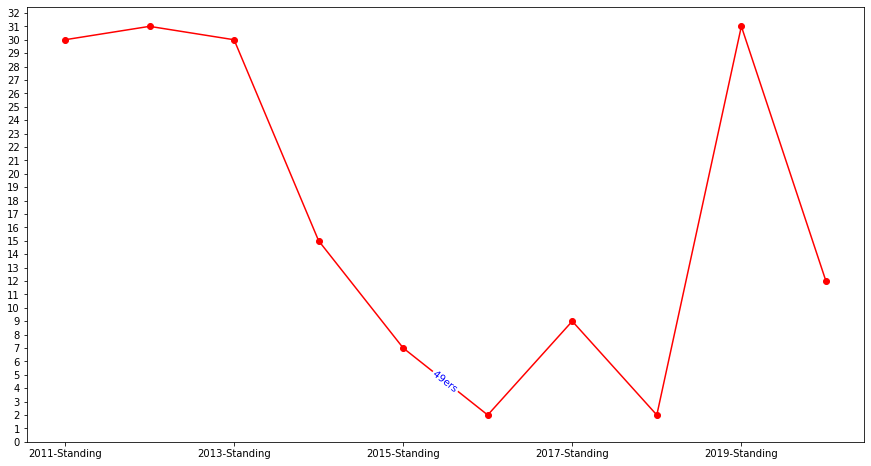

In [43]:
NinersRank = RankTable['49ers']
ax = NinersRank.plot(figsize = (15,8),color = 'r',marker='o')
labelLines(plt.gca().get_lines(), zorder=2.5, color = 'b')
#plt.xlabel(Years_Standing)

ax.set_yticks(np.arange(33))
#ax.get_legend().remove()
plt.show()


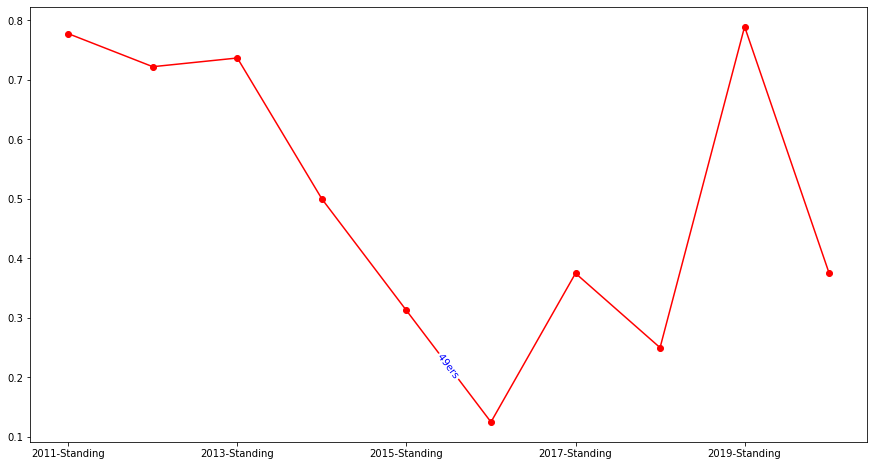

In [44]:
NinersRec = RecordTable['49ers']
ax = NinersRec.plot(figsize = (15,8),color = 'r',marker='o')
labelLines(plt.gca().get_lines(), zorder=2.5, color = 'b')
#ax.get_legend().remove()
plt.show()

In [45]:
RecordTableCopy = RecordTable.copy()
RecordTableCopy['League Average'] = RecordTableCopy.mean(axis=1)

In [46]:
RecordTableCopy

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,...,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings,League Average
2011-Standing,0.777778,0.500000,0.529412,0.375000,0.500000,0.250000,0.2500,0.500000,0.500000,0.437500,0.125000,0.500000,0.375000,0.500000,0.588235,0.650000,...,0.5000,0.588235,0.882353,0.375000,0.789474,0.500000,0.125000,0.722222,0.312500,0.722222,0.437500,0.705882,0.611111,0.562500,0.187500,0.490373
2012-Standing,0.722222,0.625000,0.588235,0.375000,0.764706,0.312500,0.4375,0.312500,0.437500,0.125000,0.647059,0.500000,0.437500,0.250000,0.777778,0.562500,...,0.3750,0.250000,0.666667,0.437500,0.722222,0.250000,0.466667,0.700000,0.588235,0.437500,0.666667,0.500000,0.722222,0.375000,0.588235,0.492060
2013-Standing,0.736842,0.500000,0.647059,0.600000,0.789474,0.250000,0.2500,0.625000,0.555556,0.647059,0.666667,0.500000,0.500000,0.588235,0.250000,0.437500,...,0.5000,0.437500,0.500000,0.705882,0.736842,0.250000,0.437500,0.500000,0.187500,0.666667,0.842105,0.500000,0.125000,0.437500,0.500000,0.503746
2014-Standing,0.500000,0.312500,0.625000,0.562500,0.705882,0.437500,0.1250,0.647059,0.562500,0.562500,0.684211,0.722222,0.500000,0.625000,0.375000,0.375000,...,0.2500,0.647059,0.722222,0.470588,0.789474,0.187500,0.375000,0.611111,0.250000,0.437500,0.736842,0.647059,0.562500,0.125000,0.437500,0.492460
2015-Standing,0.312500,0.375000,0.705882,0.500000,0.789474,0.187500,0.3750,0.777778,0.250000,0.666667,0.500000,0.250000,0.375000,0.437500,0.500000,0.375000,...,0.6250,0.437500,0.611111,0.894737,0.722222,0.437500,0.437500,0.312500,0.529412,0.437500,0.611111,0.611111,0.529412,0.187500,0.647059,0.491280
2016-Standing,0.125000,0.187500,0.400000,0.437500,0.562500,0.062500,0.5625,0.466667,0.312500,0.705882,0.500000,0.764706,0.529412,0.437500,0.684211,0.647059,...,0.3125,0.529412,0.631579,0.375000,0.894737,0.705882,0.312500,0.500000,0.533333,0.437500,0.647059,0.684211,0.555556,0.562500,0.500000,0.494288
2017-Standing,0.375000,0.312500,0.437500,0.529412,0.312500,0.000000,0.3125,0.500000,0.562500,0.588235,0.250000,0.562500,0.375000,0.842105,0.611111,0.187500,...,0.3125,0.562500,0.437500,0.647059,0.789474,0.375000,0.687500,0.562500,0.437500,0.666667,0.562500,0.764706,0.250000,0.555556,0.722222,0.491348
2018-Standing,0.250000,0.705882,0.375000,0.375000,0.375000,0.466667,0.3125,0.187500,0.777778,0.722222,0.611111,0.611111,0.437500,0.555556,0.437500,0.312500,...,0.2500,0.375000,0.400000,0.437500,0.736842,0.250000,0.789474,0.588235,0.437500,0.777778,0.588235,0.600000,0.647059,0.562500,0.533333,0.493712
2019-Standing,0.789474,0.500000,0.125000,0.588235,0.437500,0.375000,0.4375,0.333333,0.312500,0.789474,0.437500,0.500000,0.312500,0.529412,0.437500,0.250000,...,0.4375,0.200000,0.777778,0.312500,0.705882,0.437500,0.562500,0.823529,0.187500,0.764706,0.666667,0.500000,0.611111,0.578947,0.611111,0.490849
2020-Standing,0.375000,0.470588,0.266667,0.789474,0.312500,0.666667,0.7500,0.500000,0.437500,0.842105,0.647059,0.375000,0.625000,0.266667,0.250000,0.375000,...,0.1250,0.312500,0.777778,0.312500,0.437500,0.500000,0.611111,0.666667,0.411765,0.722222,0.705882,0.705882,0.250000,0.647059,0.437500,0.488597


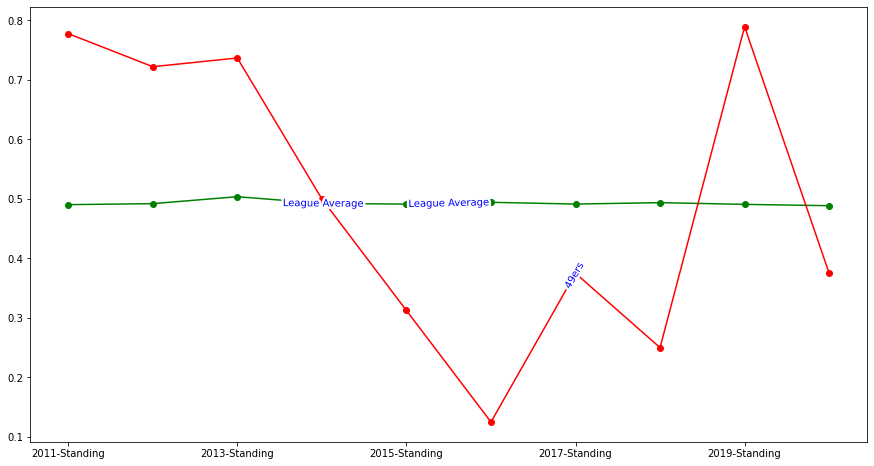

In [50]:
LeagueAvgRec = RecordTableCopy['League Average']
ax = LeagueAvgRec.plot(figsize = (15,8),color = 'g',marker='o')
labelLines(plt.gca().get_lines(), zorder=2.5, color = 'b')
NinersRec = RecordTable['49ers']
ax = NinersRec.plot(figsize = (15,8),color = 'r',marker='o')
labelLines(plt.gca().get_lines(), zorder=2.5, color = 'b')
#ax.get_legend().remove()
plt.show()

In [141]:
Recrows = RecStatsTable.loc[["std","mean"]]
Recrows
Rankrows = RankStatsTable.loc[['std','mean']]
Recrows

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,Colts,Cowboys,Dolphins,Eagles,Falcons,Giants,...,Jets,Lions,Packers,Panthers,Patriots,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings,League Avg
std,0.244002,0.155047,0.183750,0.131397,0.195391,0.197474,0.177878,0.174438,0.156410,0.205521,0.189699,0.151172,0.093044,0.172901,0.176029,0.158317,...,0.148634,0.149695,0.157508,0.191477,0.117398,0.159346,0.191984,0.142850,0.145991,0.150048,0.108601,0.096718,0.202027,0.177638,0.147202,0.162657
mean,0.496382,0.448897,0.469975,0.513212,0.554954,0.300833,0.381250,0.484984,0.470833,0.608664,0.506861,0.528554,0.446691,0.503197,0.491133,0.417206,...,0.368750,0.433971,0.640699,0.496827,0.732467,0.389338,0.480475,0.598676,0.387525,0.607026,0.646457,0.621885,0.486397,0.459406,0.516446,0.492871


In [142]:
RecT = Recrows.T
LA = Recrows.loc['std']['League Avg']
for i in range(len(RecT)):
    RecT['colors'] = ['green' if float(x) < LA else 'red' for x in RecT['std']]
# Sort values from lowest to highest
RecT.loc[RecT['std']==LA,'colors']='purple'
RecT.sort_values('std', inplace=True)


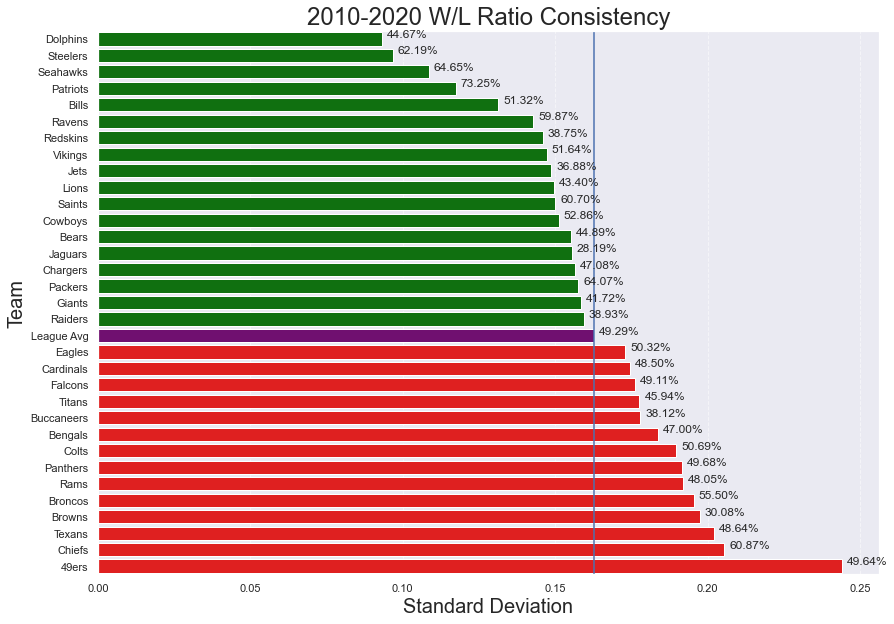

In [177]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(14,10)})
plt.axvline(x=LA2)

ax = sns.barplot(x='std', y=RecT.index, data=RecT,
                 palette=RecT['colors'].tolist())
plt.xlabel('Standard Deviation', fontsize=20)
plt.ylabel('Team', fontsize=20) 

plt.title('2010-2020 W/L Ratio Consistency', fontdict={'size': 24})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)

meanRec = RecT['mean']
#MRsum1 = sum(meanRec)
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)

for i, p in enumerate(ax.patches): ##average W/L Ratio percentage as label
    ax.annotate("%.2f%%" % (meanRec[i]*100),
                (p.get_x() + p.get_width(), p.get_y() + 0.92),
                xytext=(5, 10), textcoords='offset points')
  
# Displaying the Diverging Bar Chart
plt.show()

In [155]:
RankT = Rankrows.T
LA = Rankrows.loc['std']['League Avg']
for i in range(len(RankT)):
    RankT['colors'] = ['green' if float(x) < LA else 'red' for x in RankT['std']]
# Sort values from lowest to highest
RankT.loc[RankT['std']==LA,'colors']='purple'
RankT.sort_values('std', inplace=True)

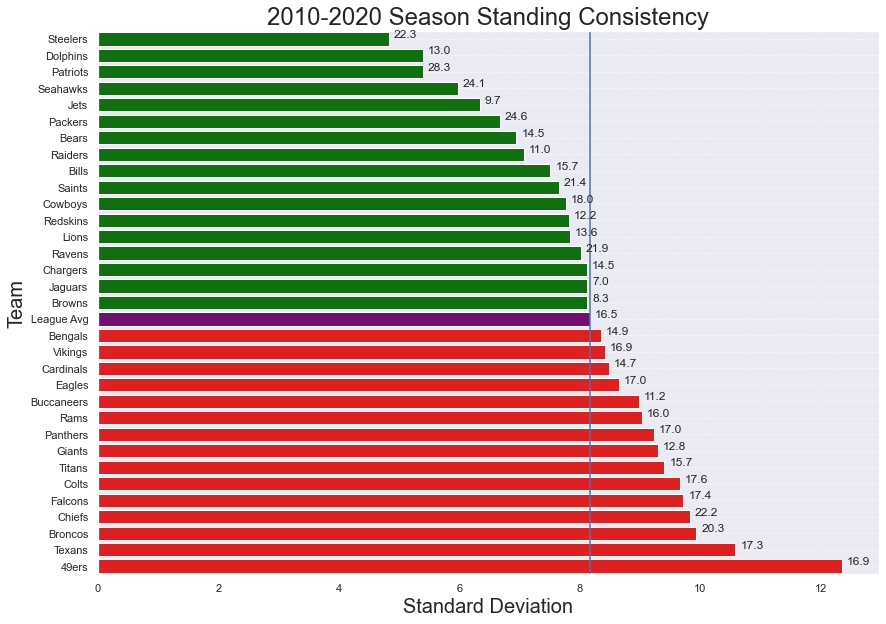

In [178]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(14,10)})
plt.axvline(x=LA)

ax = sns.barplot(x='std', y=RankT.index, data=RankT,
                 palette=RankT['colors'].tolist())

plt.xlabel('Standard Deviation', fontsize=20)
plt.ylabel('Team', fontsize=20) 

plt.title('2010-2020 Season Standing Consistency', fontdict={'size': 24})

meanRank = RankT['mean']
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)

for i, p in enumerate(ax.patches):  #average placement as label
    ax.annotate(( meanRank[i]),
                (p.get_x() + p.get_width(), p.get_y()+.92),
                xytext=(5, 10), textcoords='offset points')
#ax.legend(ncol = 2, loc = 'lower right')




# Displaying the Diverging Bar Chart
plt.show()

## Code Graveyard

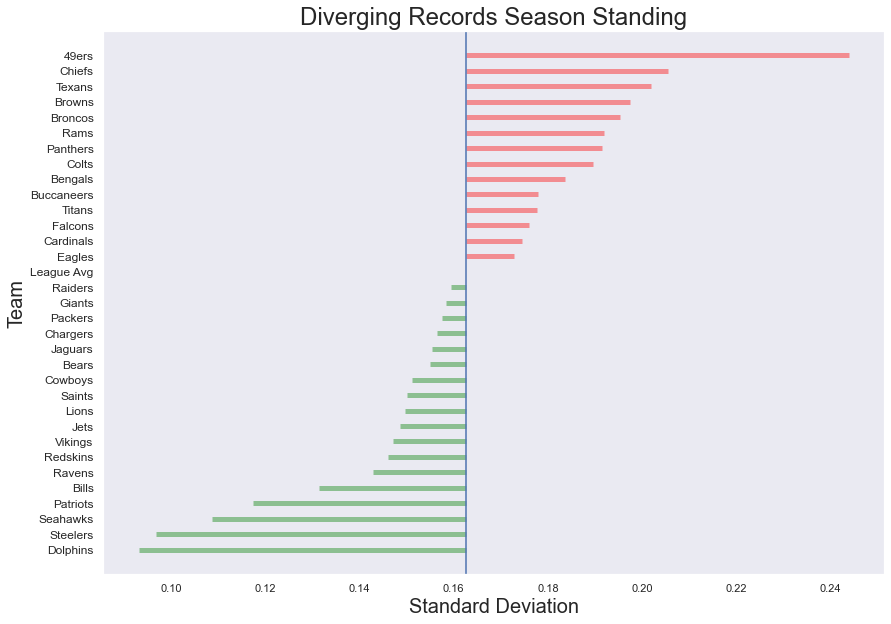

In [98]:
df = Recrows.T
df
for i in range(len(df)):
     df['colors'] = ['green' if float(x) < LA2 else 'red' for x in df['std']]
# Sort values from lowest to highest
df.sort_values('std', inplace=True)
  
df.reset_index()

#df.index.astype(str)
plt.figure(figsize=(14, 10))#, dpi=80)

plt.hlines(y=df.index, xmin = LA2, xmax= df['std'],
          color=df.colors, alpha=0.4, linewidth=5)

plt.axvline(x=LA2)


plt.xlabel('Standard Deviation', fontsize=20)
plt.ylabel('Team', fontsize=20)  
# Setting Date to y-axis
plt.yticks(df.index, fontsize=12)
  
# Title of Bar Chart
plt.title('Diverging Records Season Standing', fontdict={         'size': 24})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

In [ ]:
std = RankT['std']
stdsum = sum(std)
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)

for i, p in enumerate(ax.patches):
    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), std[i] / stdsum * 100.0),
                (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')

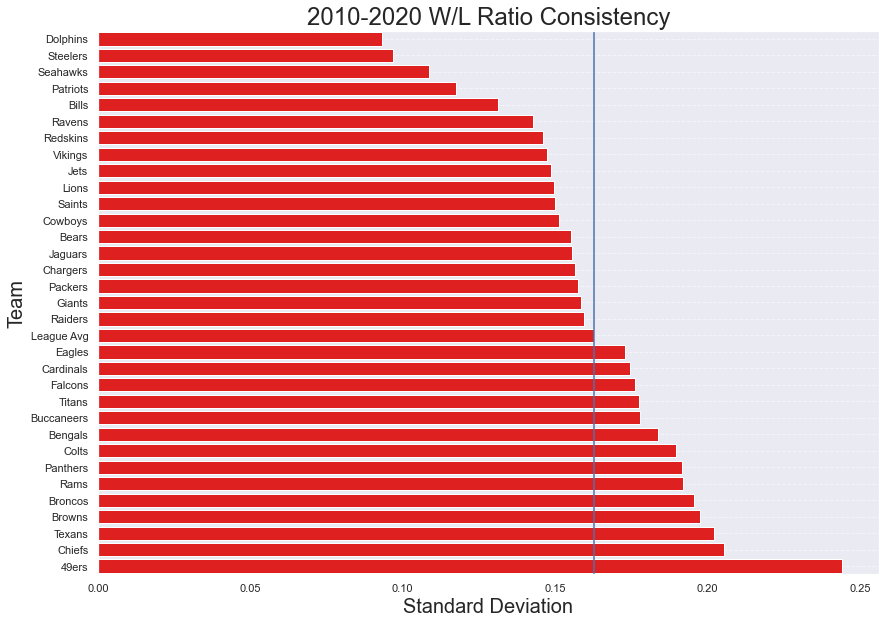

In [174]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(14,10)})
plt.axvline(x=LA2)

ax = sns.barplot(x='std', y=RecT.index, data=RecT,color = 'red')
plt.xlabel('Standard Deviation', fontsize=20)
plt.ylabel('Team', fontsize=20) 

plt.title('2010-2020 W/L Ratio Consistency', fontdict={'size': 24})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)